In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization

In [2]:

(X_tr, _), (_, _) = mnist.load_data()
X_tr = (X_tr.astype(np.float32) - 127.5) / 127.5
X_tr = X_tr.reshape(-1, 784)

gen = Sequential([
    Dense(128, input_dim=100),
    LeakyReLU(0.2),
    BatchNormalization(),
    Dense(256),
    LeakyReLU(0.2),
    BatchNormalization(),
    Dense(512),
    LeakyReLU(0.2),
    BatchNormalization(),
    Dense(784, activation='tanh')
])

disc = Sequential([
    Dense(512, input_dim=784),
    LeakyReLU(0.2),
    Dense(256),
    LeakyReLU(0.2),
    Dense(1, activation='sigmoid')
])

disc.compile(loss='binary_crossentropy', optimizer='adam')

disc.trainable = False
gan_in = gen.input
gan_out = disc(gen(gan_in))
gan = Model(gan_in, gan_out)
gan.compile(loss='binary_crossentropy', optimizer='adam')

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
if not os.path.exists('gen_images'):
    os.makedirs('gen_images')

epochs, batch_size, half_batch = 5000, 32, 16

for ep in range(epochs):
    idx = np.random.randint(0, X_tr.shape[0], half_batch)
    real_imgs, noise = X_tr[idx], np.random.normal(0, 1, (half_batch, 100))

    d_loss_real = disc.train_on_batch(real_imgs, np.ones((half_batch, 1)))
    d_loss_fake = disc.train_on_batch(gen.predict(noise), np.zeros((half_batch, 1)))
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    gan_loss = gan.train_on_batch(noise, np.ones((half_batch, 1)))

    if ep % 100 == 0:
        print(f"Epoch: {ep}, D Loss: {d_loss}, G Loss: {gan_loss}")

    if ep % 500 == 0:
        img = gen.predict(np.random.normal(0, 1, (1, 100))).reshape(28, 28)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        plt.savefig(f"gen_images/gan_img_{ep}.png")
        plt.close()

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 19ms/step
Epoch: 100, D Loss: 0.021976721473038197, G Loss: 7.133274555206299
1/1 [==============================] - 0s 19ms/step
Epoch: 200, D Loss: 0.04326547635173483, G Loss: 9.526548385620117
1/1 [==============================] - 0s 20ms/step
Epoch: 300, D Loss: 0.004929579037707299, G Loss: 9.959304809570312
1/1 [==============================] - 0s 28ms/step
Epoch: 400, D Loss: 0.4391379542648792, G Loss: 5.487632751464844
1/1 [==============================] - 0s 22ms/step
Epoch: 500, D Loss: 0.14393810066394508, G Loss: 4.495832443237305
1/1 [==============================] - 0s 20ms/step
Epoch: 600, D Loss: 0.11961710453033447, G Loss: 4.176265239715576
1/1 [==============================] - 0s 23ms/step
Epoch: 700, D Loss: 0.1063329391181469, G Loss: 4.519525527954102
1/1 [==============================] - 0s 20ms/step
Epoch: 800, D Loss: 0.2390299327671528, G Loss: 5.92772960662841

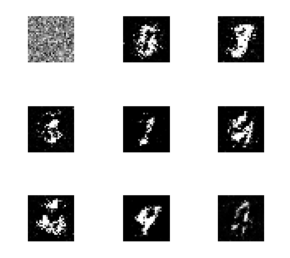

In [13]:
img_files = sorted(os.listdir('gen_images'))
all_images = [plt.imread(os.path.join('gen_images', img)) for img in img_files]

# Determine the number of rows and columns for the grid
num_rows = int(np.sqrt(len(all_images)))
num_cols = len(all_images) // num_rows

# Create a figure and plot the images as a grid
plt.figure(figsize=(num_cols, num_rows))
for i in range(num_rows):
    for j in range(num_cols):
        plt.subplot(num_rows, num_cols, i * num_cols + j + 1)
        plt.imshow(all_images[i * num_cols + j], cmap='gray')
        plt.axis('off')
plt.tight_layout()
plt.show()